In [ ]:
import pandas as pd 
import numpy as np
%matplotlib inline

In [ ]:
auto_price = pd.read_csv("data/Automobile_price_data__Raw_.csv")
## Convert some columns to numeric values
cols = ['price', 'bore', 'stroke', 'horsepower', 'peak-rpm']
auto_price[cols] = auto_price[cols].apply(pd.to_numeric, args=('coerce',))
## Remove rows with missing values 
auto_price.dropna(axis = 0, inplace = True)
## Compute the log of the auto price
auto_price['lnprice'] = np.log(auto_price.price)
## Create a column with new levels for the number of cylinders
auto_price['num-cylinders'] = ['four-or-less' 
    if x in ['two', 'three', 'four'] 
    else
        ('five-six' if x in ['five', 'six'] else 'eight-twelve') for x in auto_price['num-of-cylinders']]

print(auto_price.dtypes) 
auto_price.head(5)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
lnprice              float64
num-cylinders         object
dtype: object


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,lnprice,num-cylinders
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,9.510075,four-or-less
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,9.711116,four-or-less
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,9.711116,five-six
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.543235,four-or-less
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,9.767095,five-six


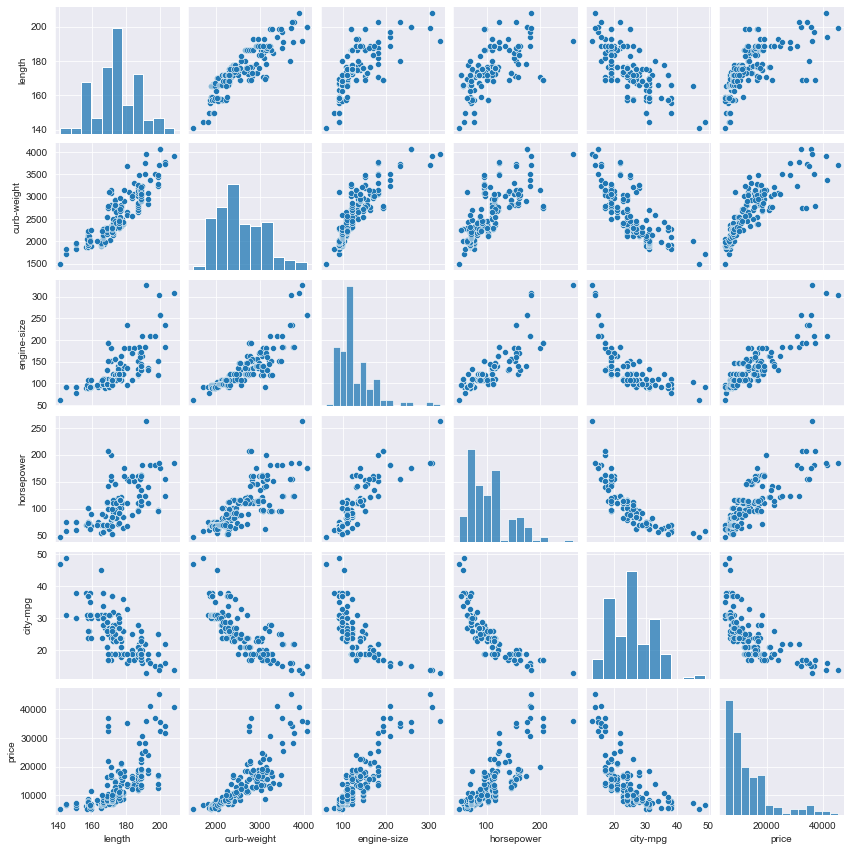

In [ ]:
import seaborn as sns
num_cols = ["length", "curb-weight", "engine-size", "horsepower", "city-mpg", "price", "fuel-type"]
sns.pairplot(auto_price[num_cols], height =2)

'drive-wheels'

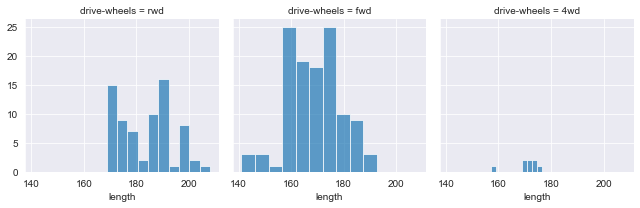

In [ ]:
import matplotlib.pyplot as plt

def cond_hists(df, plot_cols, grid_col):
## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
        return grid_col
## Define columns for making a conditioned histogram
plot_cols2 = ["length", "curbweight",
 "engine-size",
 "city-mpg",
 "price"]
cond_hists(auto_price, plot_cols2, 'drive-wheels')

'drive-wheels'

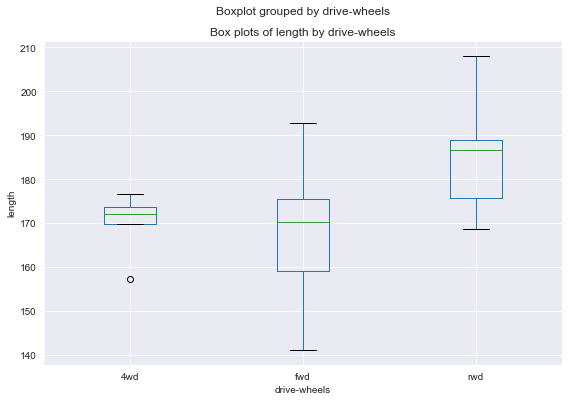

In [ ]:
## Create boxplots of data 
def auto_boxplot(df, plot_cols, by):
    for col in plot_cols: 
        fig = plt.figure(figsize=(9, 6)) 
        ax = fig.gca()
        df.boxplot(column = col, by = by, ax = ax)
        ax.set_title('Box plots of ' + col + ' by ' + by)
        ax.set_ylabel(col) 
        return by
auto_boxplot(auto_price, plot_cols2, "drive-wheels") 

C:\Users\PrimoSpade\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


['length', 'curb-weight', 'engine-size', 'city-mpg']

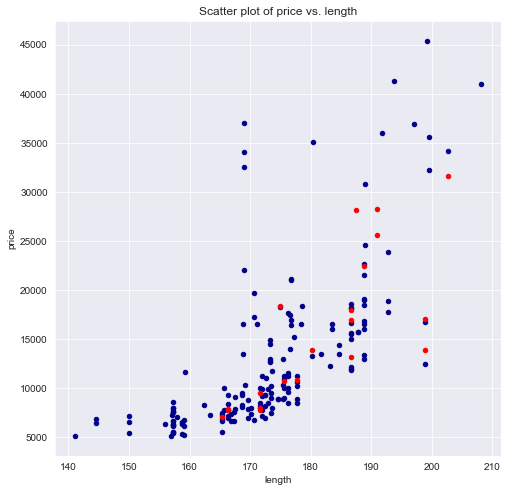

In [ ]:
## Create scatter plot
def auto_scatter(df, plot_cols):
    for col in plot_cols:
        fig = plt.figure(figsize=(8, 8))
        ax = fig.gca()
        temp1 = df.loc[df['fuel-type'] == 'gas']
        temp2 = df.loc[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:
            temp1.plot(kind = 'scatter', x = col, y = 'price' ,
            ax = ax, color = 'DarkBlue')
        if temp2.shape[0] > 0:
            temp2.plot(kind = 'scatter', x = col, y = 'price' ,
            ax = ax, color = 'Red')
        ax.set_title('Scatter plot of price vs. ' + col) 
        return plot_cols 
## Define columns for making scatter plots
plot_cols3 = ["length",
"curb-weight",
 "engine-size",
 "city-mpg"]
auto_scatter(auto_price, plot_cols3)

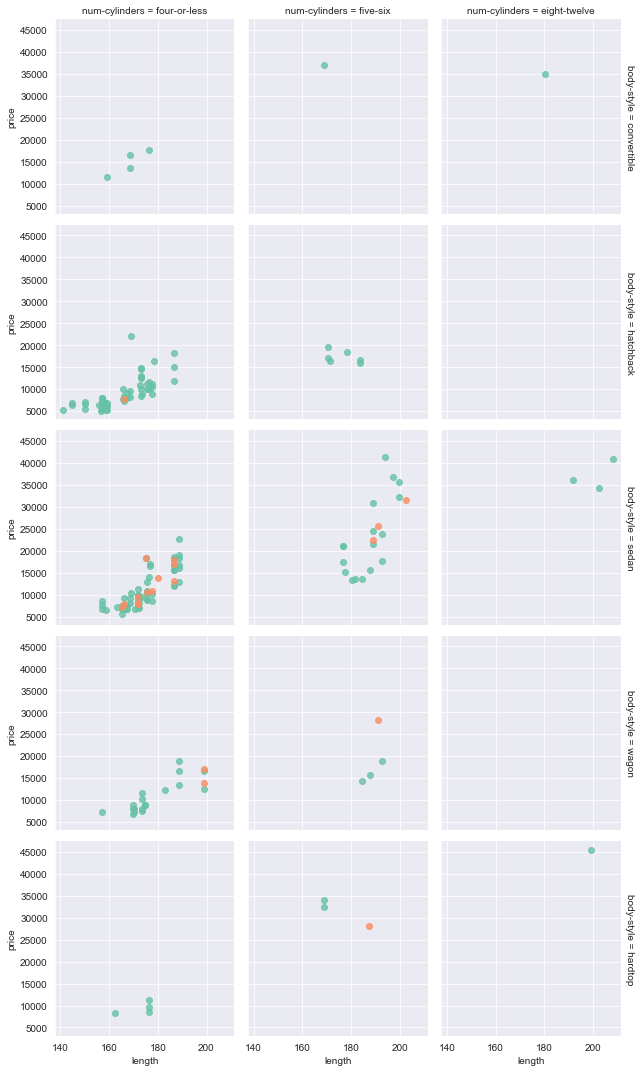

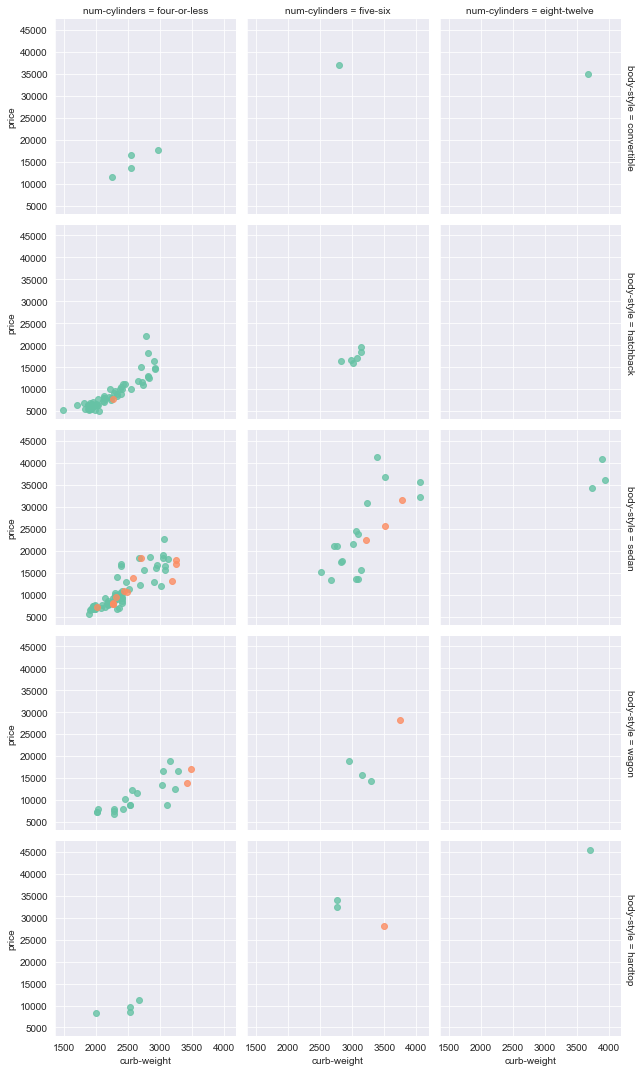

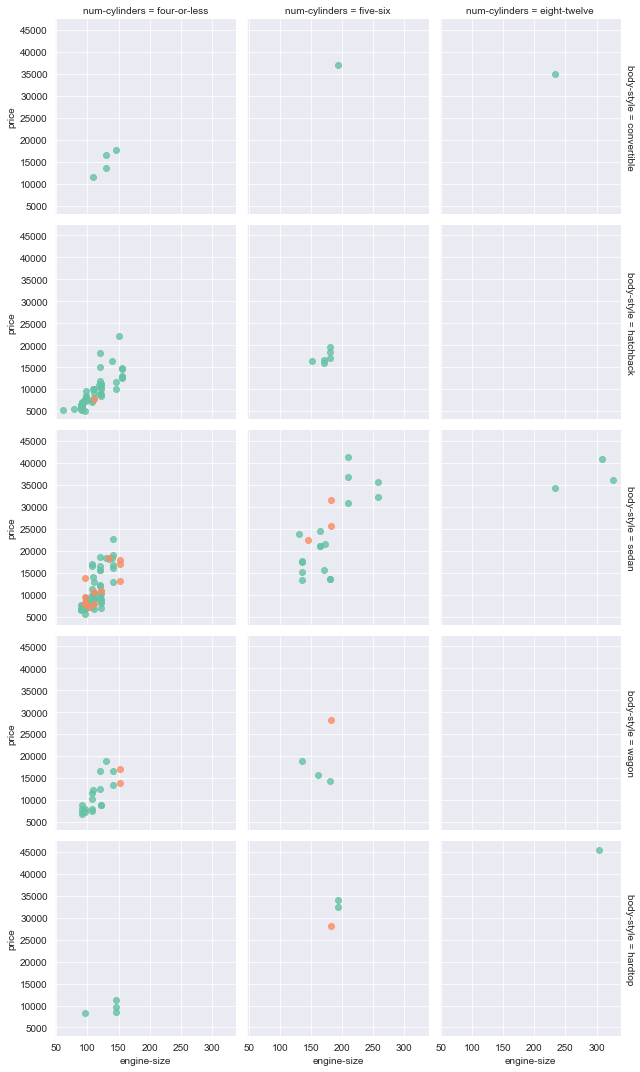

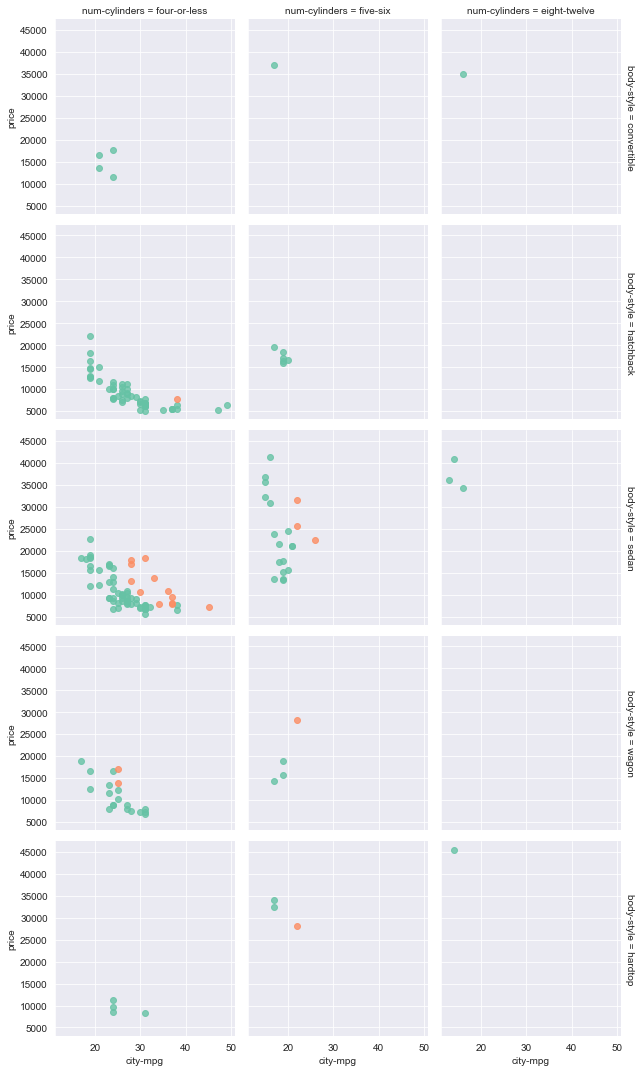

In [ ]:
import ipywidgets
def cond_plot(cols):
    for col in cols:
        g = sns.FacetGrid(auto_price, col="num-cylinders", row = 'body-style', hue="fuel-type", palette="Set2", margin_titles=True)
        g.map(sns.regplot, col, "price", fit_reg = False)
# g.map(sns.regplot, "engine-size", "price", fit_reg = False)
cond_plot(plot_cols3)

'drive-wheels'

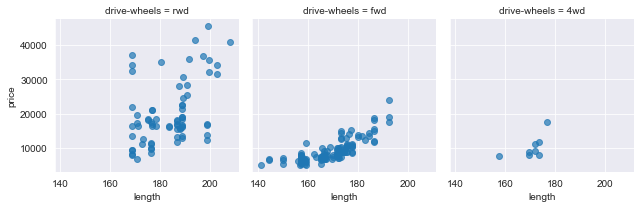

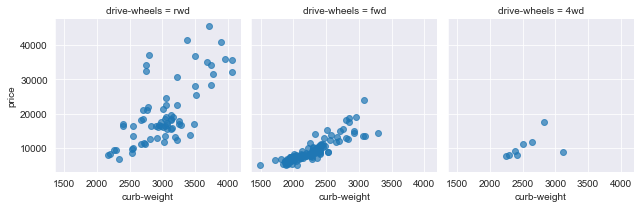

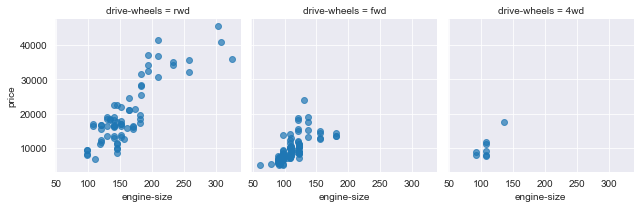

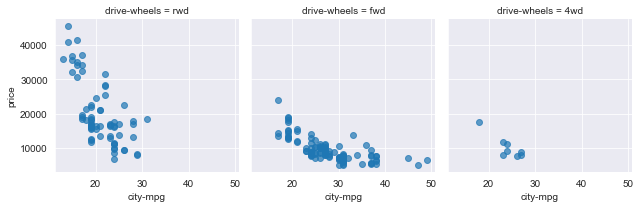

In [8]:
# Create a conditioned scatter plot using Seaborn and IPyWidgets
def auto_cond_scatter(df, plot_cols, grid_col):
    for col in plot_cols:
        grid = sns.FacetGrid(df, col=grid_col)
        grid.map(plt.scatter, col, 'price', alpha=.7)
    return grid_col

auto_cond_scatter(auto_price, plot_cols3, "drive-wheels")